In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
from sklearn.datasets import load_iris

In [44]:
data = pd.read_csv('irisdata.csv', header = -1)
col = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.columns = col
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [47]:
iris = sns.load_dataset('iris')

In [48]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


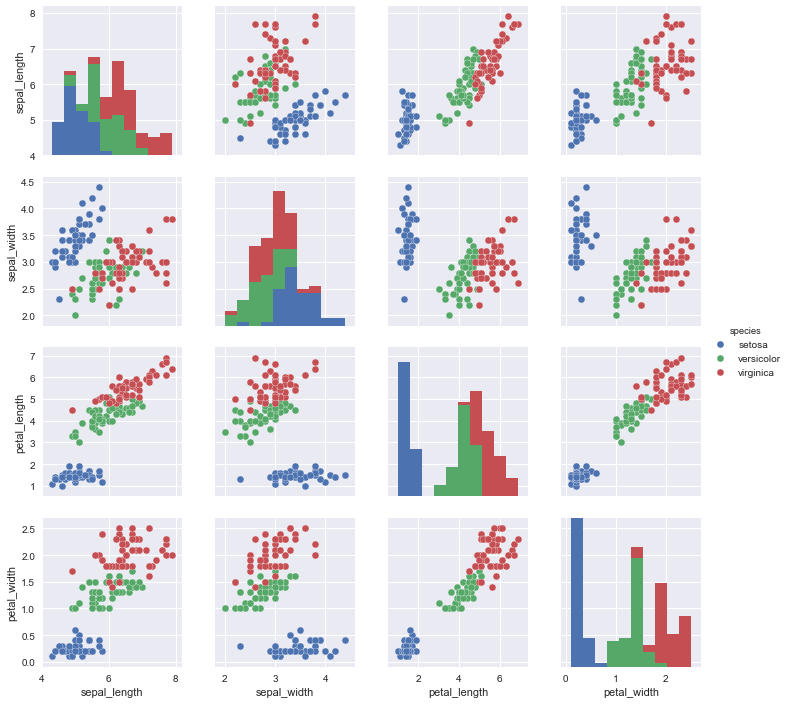

In [84]:
sns.pairplot(iris, hue = 'species', aspect = 1)
?sns.pairplot()

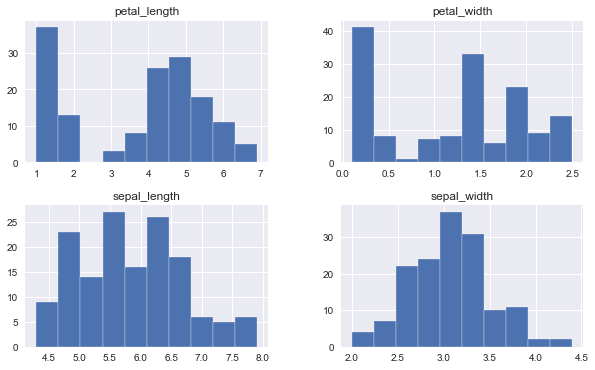

In [62]:
iris.hist(edgecolor = 'white', figsize = (10,6))
plt.show()

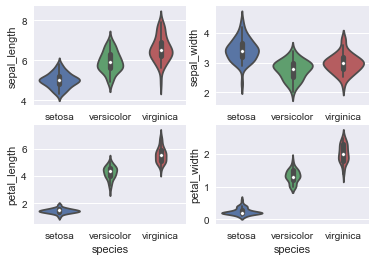

In [75]:
plt.subplot(2,2,1)
sns.violinplot(x = 'species', y = 'sepal_length', data = iris)

plt.subplot(2,2,2)
sns.violinplot(x = 'species', y = 'sepal_width', data = iris)

plt.subplot(2,2,3)
sns.violinplot(x = 'species', y = 'petal_length', data = iris)

plt.subplot(2,2,4)
sns.violinplot(x = 'species', y = 'petal_width', data = iris)

plt.show()

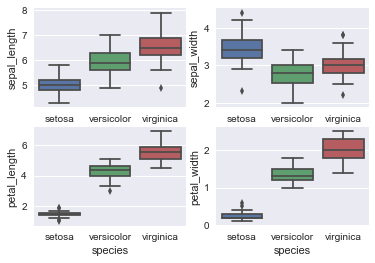

In [76]:
plt.subplot(2,2,1)
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)

plt.subplot(2,2,2)
sns.boxplot(x = 'species', y = 'sepal_width', data = iris)

plt.subplot(2,2,3)
sns.boxplot(x = 'species', y = 'petal_length', data = iris)

plt.subplot(2,2,4)
sns.boxplot(x = 'species', y = 'petal_width', data = iris)

plt.show()

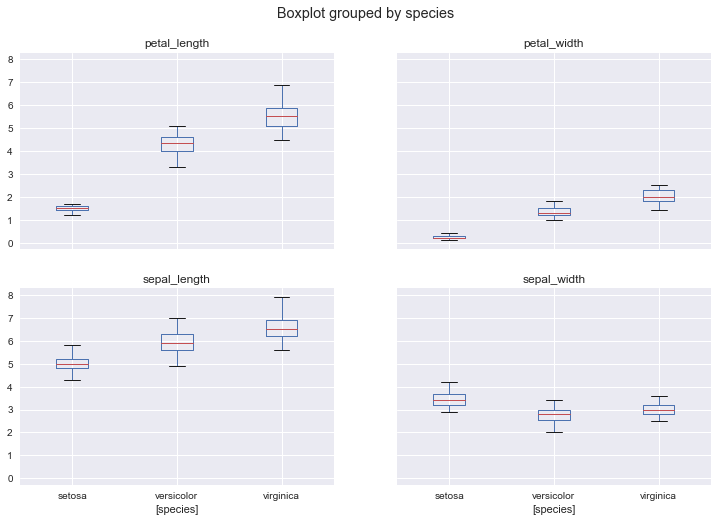

In [83]:
iris.boxplot(by = 'species', figsize = (12, 8))
plt.show()

### Sci-kit Learn

In [92]:
iris = load_iris()

#### Basic Steps

1. Choose a class of model
2. Choose model hyperparameters
3. Arrange data into features matrix and target array
4. Fit model to data
5. Apply trained model to new data

### 1. Supervised Learning - Simple Linear Regression

In [93]:
x = 10*np.random.rand(100)
x

array([8.66871651, 0.63619182, 3.13387373, 0.40685945, 1.98114537,
       5.14995104, 9.48864845, 8.84249216, 4.64966914, 8.69882743,
       9.50794187, 9.24585461, 2.01358595, 6.49993427, 4.76239856,
       5.84528182, 4.78263047, 1.84843984, 1.74764097, 6.29181817,
       3.23323806, 0.05831647, 5.54507647, 2.75749825, 9.37233228,
       4.10986697, 3.33236078, 2.17992263, 9.7321344 , 2.87675519,
       3.9893884 , 8.16041842, 8.37537816, 3.32743929, 7.3133346 ,
       0.4603226 , 6.08533888, 0.70694494, 2.17631244, 7.57940486,
       1.5057268 , 1.32379791, 8.92054884, 0.13387361, 3.08501946,
       2.82349115, 0.17230948, 0.02075473, 1.30212885, 0.23450633,
       4.88397306, 5.80551713, 4.43775544, 7.75350758, 3.76132776,
       0.55696811, 1.78425777, 1.43213408, 4.27406784, 4.68591073,
       4.99503825, 7.78597796, 0.68013696, 0.75585487, 8.48898157,
       6.72056857, 0.91820154, 6.67240745, 0.98571698, 4.93622663,
       4.26449103, 5.37885546, 9.03170399, 5.5287965 , 3.95601

In [94]:
y = 3*x + np.random.randn(100)

In [95]:
y

array([24.51390969,  2.49991182, 11.17165184,  0.11681553,  5.00488192,
       14.05549545, 29.56101988, 25.20364207, 14.83415784, 27.12108117,
       28.15277764, 27.00750297,  6.20190645, 19.94627631, 14.70469705,
       17.37146793, 15.16712798,  4.8454783 ,  5.13609706, 18.27480058,
       10.60966503, -0.07282229, 16.22264817,  8.89712286, 30.53340554,
       11.5286447 ,  9.35069014,  4.78110257, 29.27271178, 10.09868374,
        9.88572272, 24.55075658, 23.07080707, 10.32546863, 21.93583791,
        1.65742885, 19.19424575,  1.92116952,  7.42700323, 21.74345648,
        5.33566805,  3.78172666, 27.91052485,  0.20635349,  8.13612045,
        8.09074663,  1.95182293,  0.53918968,  4.52517217, -0.60303028,
       16.21044393, 16.69556534, 10.81361867, 24.09345811, 10.97705156,
        2.50843577,  4.56274728,  3.35983066, 13.89376689, 14.2810554 ,
       15.95525424, 24.60342256,  3.38325674,  1.79140531, 23.25523239,
       19.56315674,  1.11889302, 19.5759858 ,  1.61393004, 15.81

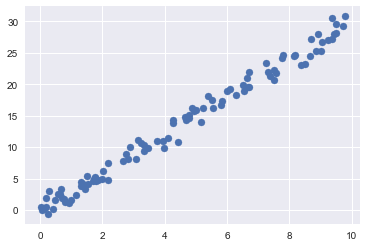

In [96]:
plt.scatter(x,y)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression(fit_intercept=True)

In [100]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
X = x.reshape(-1,1)
X.shape

(100, 1)

In [107]:
y.shape

(100,)

In [108]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
model.coef_

array([3.00527285])

In [110]:
model.intercept_

-0.047210962750456886

In [116]:
x_fit = np.linspace(-1,11)
X_fit = x_fit.reshape(-1, 1)

In [117]:
y_fit = model.predict(X_fit)

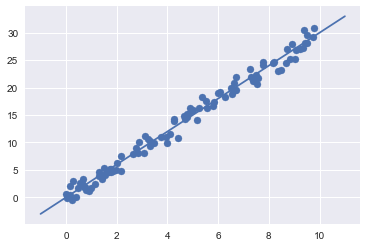

In [120]:
plt.scatter(x,y)
plt.plot(x_fit, y_fit)